# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [135]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [136]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [137]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [138]:
df = pd.read_csv('used_device_data.csv')

## Data Overview

In [139]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [140]:
df.shape

(3454, 15)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [143]:
df.describe(include='object').T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

1. What does the distribution of normalized used device prices look like?

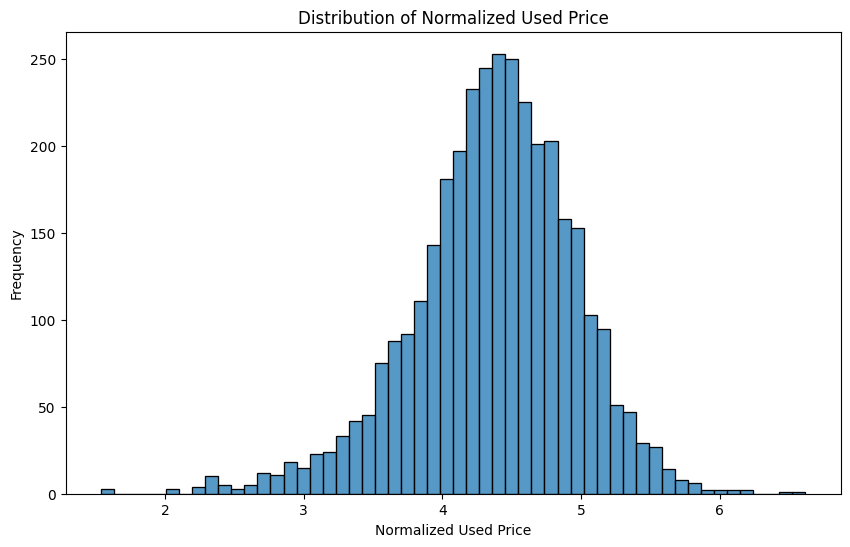

In [144]:
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_used_price'])
plt.title('Distribution of Normalized Used Price')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.show()

2. What percentage of the used device market is dominated by Android devices?

In [145]:
os = df['os'].value_counts(normalize=True)*100
print(os)
print(f'\nPercentage of used device market share for Android: {os["Android"]:.2f}%')

os
Android    93.051534
Others      3.966416
Windows     1.939780
iOS         1.042270
Name: proportion, dtype: float64

Percentage of used device market share for Android: 93.05%


3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [146]:
# show max columns
pd.set_option('display.max_columns', None)
df.groupby('brand_name')['ram'].describe().T


brand_name,Acer,Alcatel,Apple,Asus,BlackBerry,Celkon,Coolpad,Gionee,Google,HTC,Honor,Huawei,Infinix,Karbonn,LG,Lava,Lenovo,Meizu,Micromax,Microsoft,Motorola,Nokia,OnePlus,Oppo,Others,Panasonic,Realme,Samsung,Sony,Spice,Vivo,XOLO,Xiaomi,ZTE
count,51.000000,121.000000,39.000000,122.000000,22.000000,33.000000,22.000000,56.000000,15.000000,110.000000,116.000000,251.000000,10.000000,29.000000,201.000000,36.000000,171.000000,62.000000,117.000000,22.0,106.000000,102.000000,22.000000,129.000000,502.000000,47.0,41.000000,341.000000,86.000000,30.000000,117.000000,49.0,132.000000,140.000000
mean,3.901961,3.407025,4.000000,4.049180,3.829545,1.613636,3.954545,3.933036,4.533333,4.000000,4.603448,4.655378,2.600000,3.353448,3.936567,3.277778,3.885965,4.451613,3.679487,4.0,3.943396,2.420294,6.363636,4.961240,3.777888,4.0,4.195122,4.199413,4.069767,3.750000,4.756410,4.0,4.583333,4.023214
std,0.500196,1.263730,0.606977,0.600997,0.799503,1.831891,0.213201,0.501115,0.915475,0.331801,1.625232,1.595387,0.843274,1.441597,1.076461,1.413933,0.774222,1.223773,1.052934,0.0,1.329735,1.889325,2.592029,2.122804,1.015827,0.0,1.327018,1.377140,0.479968,0.951405,1.638196,0.0,1.508458,0.909530
min,1.000000,0.250000,2.000000,2.000000,0.250000,0.250000,3.000000,0.250000,4.000000,3.000000,2.000000,0.250000,2.000000,0.250000,0.250000,0.250000,0.250000,2.000000,0.250000,4.0,2.000000,0.020000,4.000000,1.000000,0.250000,4.0,2.000000,0.250000,4.000000,0.250000,0.500000,4.0,2.000000,0.250000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,0.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,0.030000,4.000000,4.000000,4.000000,4.0,3.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,0.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,6.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,6.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,8.000000,6.000000,4.000000,4.0,6.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000
max,4.000000,4.000000,6.000000,8.000000,4.000000,4.000000,4.000000,4.000000,6.000000,6.000000,8.000000,12.000000,4.000000,4.000000,8.000000,4.000000,6.000000,8.000000,4.000000,4.0,12.000000,6.000000,12.000000,12.000000,8.000000,4.0,6.000000,12.000000,8.000000,4.000000,8.000000,4.0,12.000000,8.000000


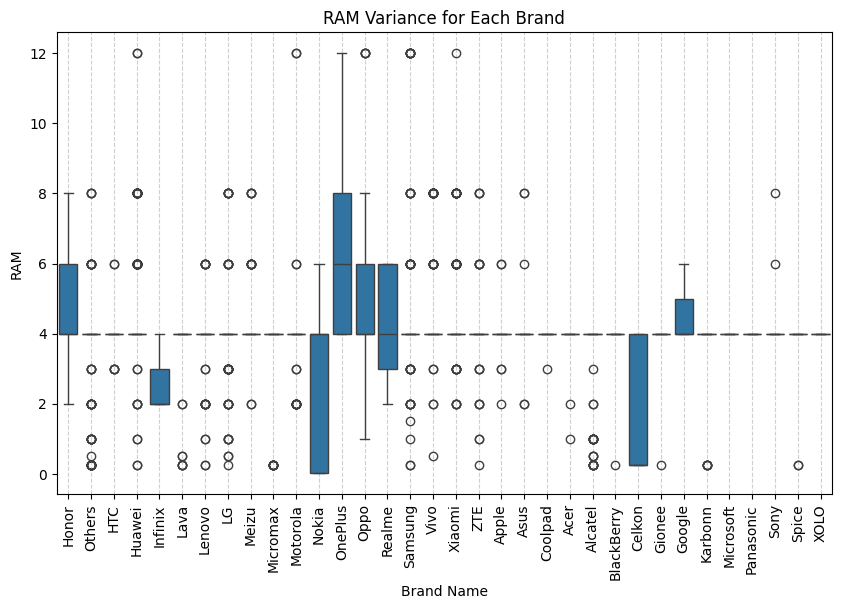

In [147]:
# visualize variance of ram for each brand
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90, ha='center')
plt.title('RAM Variance for Each Brand')
plt.xlabel('Brand Name')
plt.ylabel('RAM')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The amount of RAM varies significantly across brands, reflecting their target markets and device offerings. Brands like OnePlus and Samsung offer a broader range of RAM configurations, from 4 GB to higher values like 12 GB, catering to both mid-range and flagship devices. However, for Samsung, this range includes outliers that may misguide the perception of variance. Budget-focused brands like HTC and Lava show narrower ranges, often concentrating around 2–4 GB, indicating limited offerings aimed at specific segments. Overall, brands with higher variance generally target diverse customer bases, while those with less variance focus on more specific markets.

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

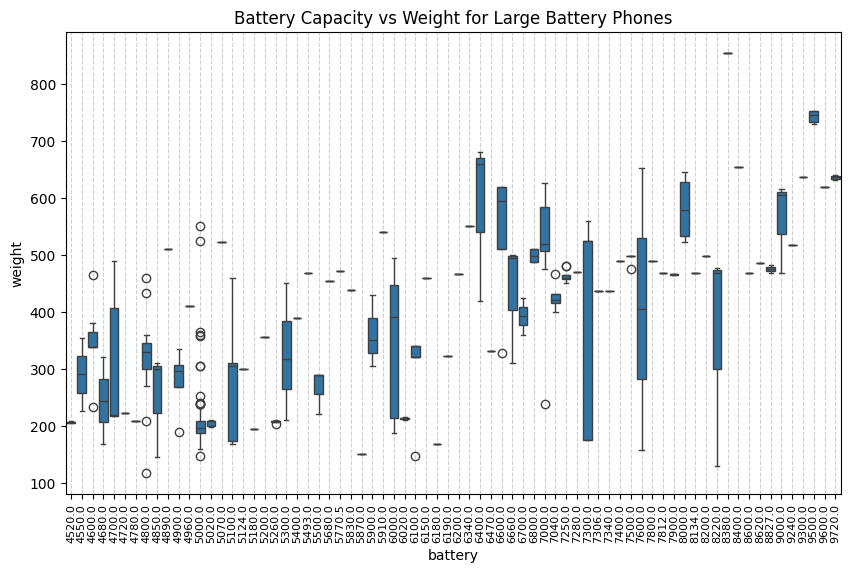

In [148]:
large_battery = df[df['battery'] > 4500]

plt.figure(figsize=(10, 6))
sns.boxplot(data=large_battery, x='battery', y='weight')
plt.title('Battery Capacity vs Weight for Large Battery Phones')
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Phones and tablets with larger bateries do tend to increase in weight but we can also see that there are many notable exceptions, on 7306 batteries among others on the higher end we see a large variance that reaches weights similar to the lower end of the battery sizes.

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [149]:
df.head(1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.5,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.7151


In [150]:
large_screen_devices = df[df['screen_size'] > 6]

# Count the number of phones and tablets with large screens for each brand
device_counts = large_screen_devices.groupby('brand_name').size().reset_index(name='count')

print(device_counts)

    brand_name  count
0         Acer     51
1      Alcatel    115
2        Apple     39
3         Asus    122
4   BlackBerry     21
5       Celkon     25
6      Coolpad     22
7       Gionee     56
8       Google     15
9          HTC    110
10       Honor    116
11      Huawei    251
12     Infinix     10
13     Karbonn     29
14          LG    197
15        Lava     36
16      Lenovo    171
17       Meizu     62
18    Micromax    108
19   Microsoft     22
20    Motorola    106
21       Nokia     72
22     OnePlus     22
23        Oppo    129
24      Others    479
25   Panasonic     47
26      Realme     41
27     Samsung    334
28        Sony     86
29       Spice     30
30        Vivo    117
31        XOLO     49
32      Xiaomi    132
33         ZTE    140


6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [151]:
high_selfie_camera_devices = df[df['selfie_camera_mp'] > 8]

device_counts = high_selfie_camera_devices['brand_name'].value_counts().reset_index()
device_counts.columns = ['brand_name', 'count']

print(device_counts)

    brand_name  count
0       Huawei     87
1         Vivo     78
2         Oppo     75
3       Xiaomi     63
4      Samsung     57
5        Honor     41
6       Others     34
7           LG     32
8     Motorola     26
9        Meizu     24
10         ZTE     20
11         HTC     20
12      Realme     18
13     OnePlus     18
14        Sony     14
15      Lenovo     14
16       Nokia     10
17        Asus      6
18     Infinix      4
19      Gionee      4
20     Coolpad      3
21    Micromax      2
22  BlackBerry      2
23   Panasonic      2
24        Acer      1


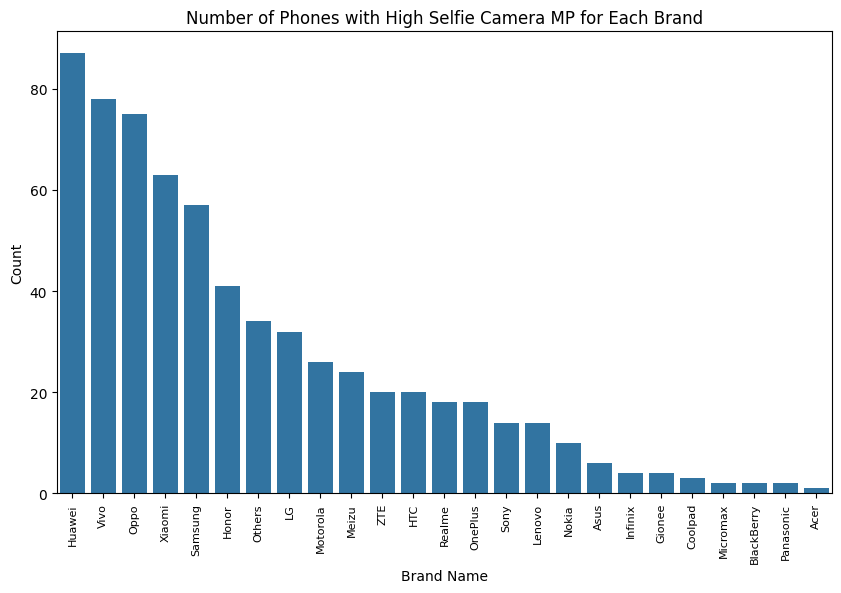

In [152]:
plt.figure(figsize=(10, 6))
sns.barplot(data=device_counts, x='brand_name', y='count')
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('Number of Phones with High Selfie Camera MP for Each Brand')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.show()

7. Which attributes are highly correlated with the normalized price of a used device?

<Axes: >

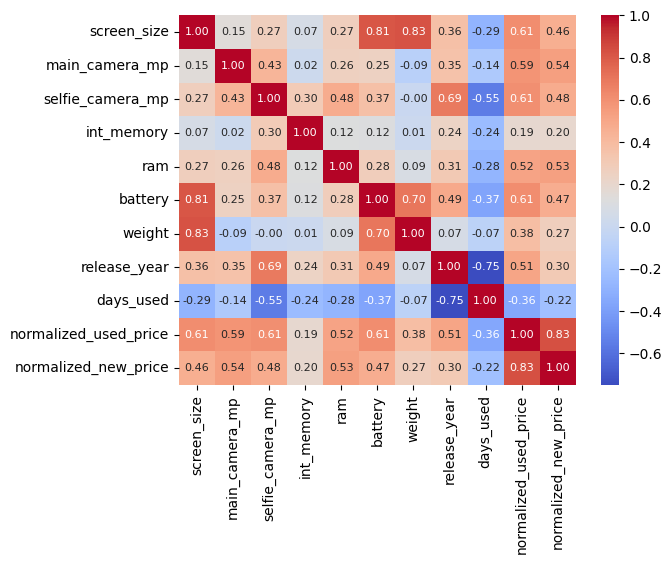

In [153]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical attributes
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 8}, fmt='.2f', cmap='coolwarm')

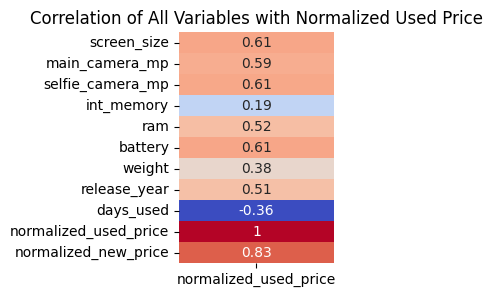

In [154]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical attributes
correlation_matrix = numerical_df.corr()

# Extract the correlation of all variables with 'normalized_used_price'
correlation_with_target = correlation_matrix[['normalized_used_price']]

# Visualize the correlation with a heatmap
plt.figure(figsize=(2, 3))
sns.heatmap(correlation_with_target, annot=True, annot_kws={'size': 10}, cmap='coolwarm', cbar=False)
plt.title('Correlation of All Variables with Normalized Used Price')
plt.show()

Within the numeric values the variables with the most correlation to 'normalized_used_price' are 'normalized_new_price' (0.83), 'battery', 'selfie_camera_mp', 'screen_size' (all with 0.61), 'main_camera_mp' (0.59), 'ram' (0.52) and 'release_year' (0.51) 

In [155]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Concatenate the list of categorical columns with the 'normalized_used_price' column
selected_columns = list(categorical_columns) + ['normalized_used_price']

df1 = df[selected_columns]

# hot one enconding 
df_hoe = pd.get_dummies(df1, df1.select_dtypes(include=['object','category']).columns)

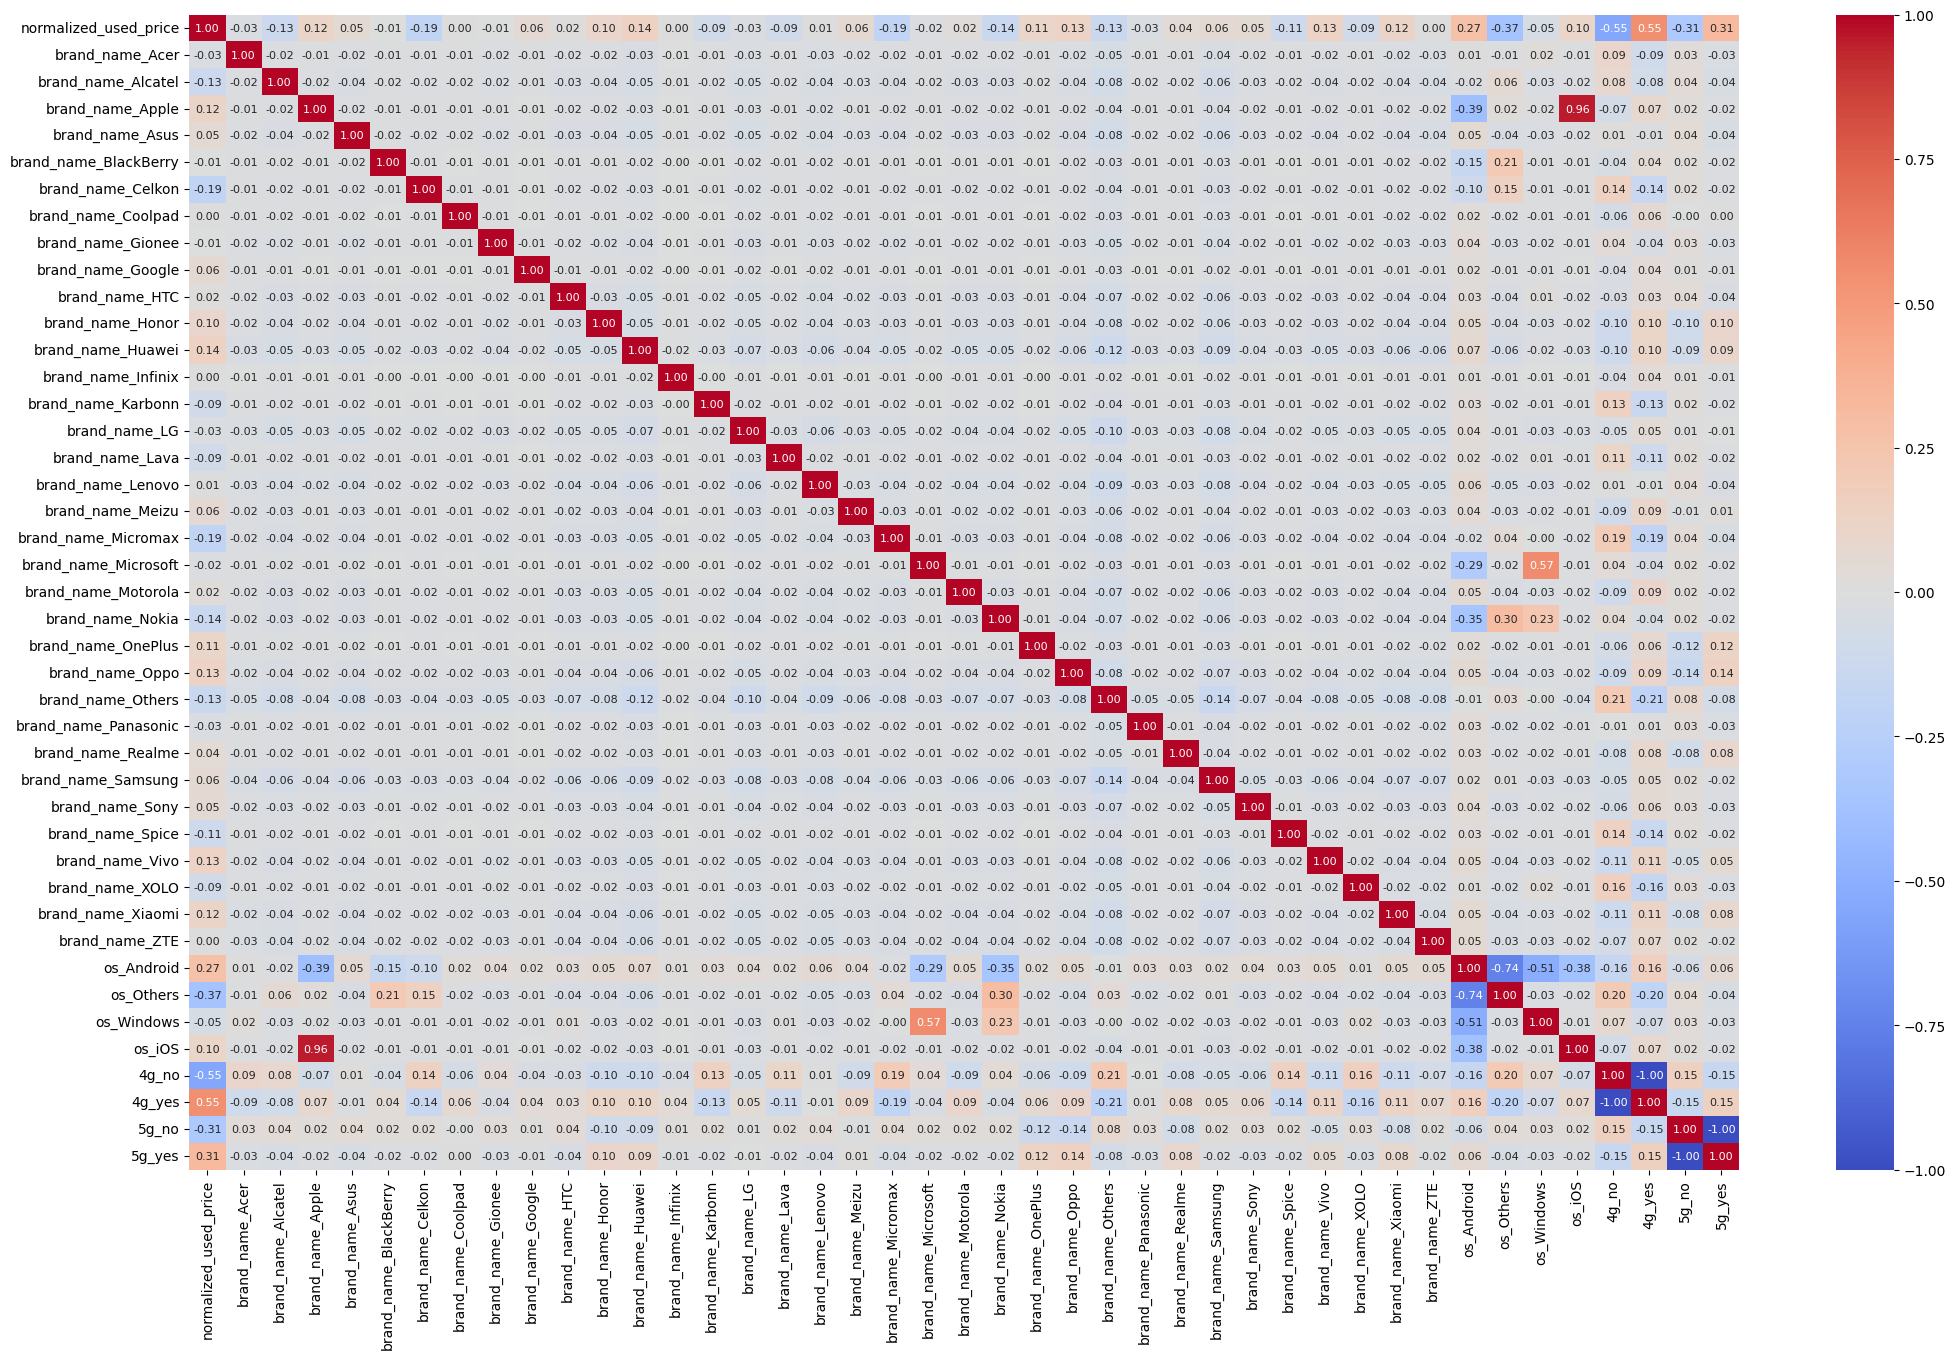

In [156]:
# Calculate the correlation matrix for categorical attributes
correlation_matrix = df_hoe.corr()

plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 8}, fmt='.2f', cmap='coolwarm')
plt.show()

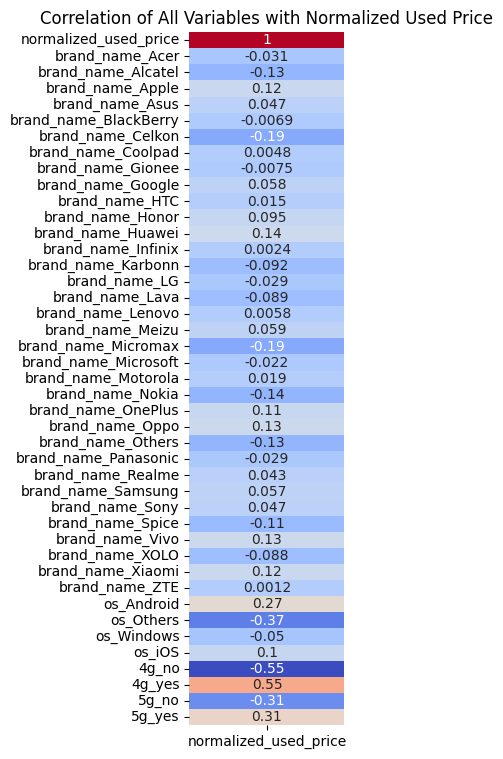

In [157]:
correlation_with_target = correlation_matrix[['normalized_used_price']]

plt.figure(figsize=(2, 9))
sns.heatmap(correlation_with_target, annot=True, annot_kws={'size': 10}, cmap='coolwarm', cbar=False)
plt.title('Correlation of All Variables with Normalized Used Price')
plt.show()

In [158]:
correlation_with_target['normalized_used_price'].sort_values(ascending=False)

normalized_used_price    1.000000
4g_yes                   0.550657
5g_yes                   0.313640
os_Android               0.266355
brand_name_Huawei        0.137800
brand_name_Vivo          0.131472
brand_name_Oppo          0.130640
brand_name_Xiaomi        0.117087
brand_name_Apple         0.116124
brand_name_OnePlus       0.107071
os_iOS                   0.103146
brand_name_Honor         0.095150
brand_name_Meizu         0.059098
brand_name_Google        0.058429
brand_name_Samsung       0.057263
brand_name_Asus          0.047448
brand_name_Sony          0.046986
brand_name_Realme        0.042738
brand_name_Motorola      0.018560
brand_name_HTC           0.015482
brand_name_Lenovo        0.005769
brand_name_Coolpad       0.004761
brand_name_Infinix       0.002425
brand_name_ZTE           0.001181
brand_name_BlackBerry   -0.006874
brand_name_Gionee       -0.007482
brand_name_Microsoft    -0.021624
brand_name_LG           -0.028602
brand_name_Panasonic    -0.029130
brand_name_Ace

Within the categorical values most correlation to 'normalized_used_price' are '4g_yes' (0.55), '5g_yes' (0.31) after which there are no notable ones. Andriod os appears to have a higher correlation than ios. Brands can be divided into 3 ranges of similar correlations.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Values

In [159]:
# missing values 
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [160]:
# Droping missing values limited to variables with high correlation in order to reduce loss of data.
df.dropna(subset=['main_camera_mp','selfie_camera_mp','ram','battery'], inplace=True)

### Hot one encoding

In [161]:
df2 = pd.get_dummies(df, df.select_dtypes(include=['object','category']).columns)
df2.drop(columns={'4g_no','5g_no'},inplace=True)

Due to having low correlation int_memory, weight, and days_used will be removed

In [162]:
df2.drop(columns={'int_memory','weight','days_used'}, inplace=True)

### Grouping brand names by absolute correlation

By grouping brand names into different groups the model can be tested trying out and removing entire groups at a time instead of independent variables

In [163]:
df_hoe = pd.get_dummies(df2, df2.select_dtypes(include=['object','category']).columns)

In [164]:
orrelation_with_target = correlation_matrix[['normalized_used_price']]

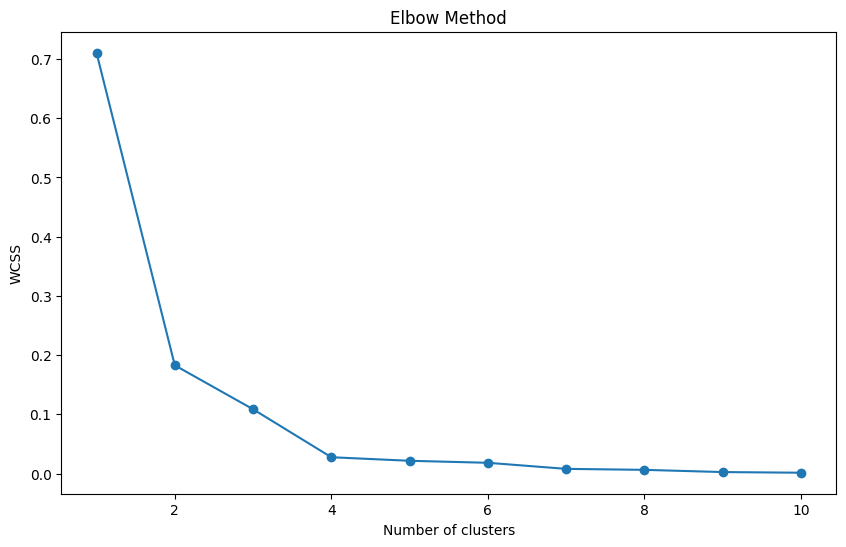

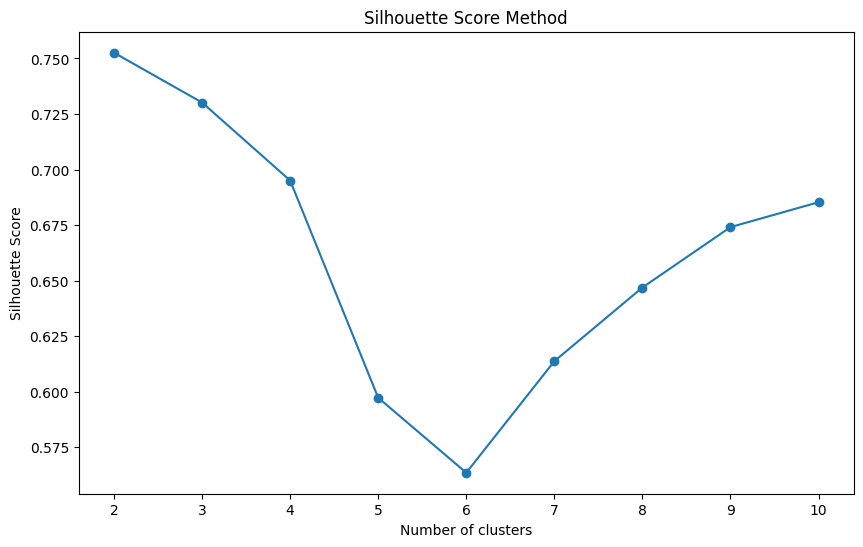

In [165]:
# Sort the correlation values by their absolute values in descending order
sorted_correlation = correlation_with_target.apply(abs).sort_values(by='normalized_used_price', ascending=False)

# Convert the sorted correlation values to a DataFrame
sorted_correlation_df = sorted_correlation.reset_index()

# remove the 'normalized_used_price' row
sorted_correlation_df = sorted_correlation_df[sorted_correlation_df['index'] != 'normalized_used_price']

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(sorted_correlation_df[['normalized_used_price']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(sorted_correlation_df[['normalized_used_price']])
    silhouette_avg = silhouette_score(sorted_correlation_df[['normalized_used_price']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [166]:
sorted_correlation = correlation_with_target.apply(abs).sort_values(by='normalized_used_price',ascending=False)

# Convert the sorted correlation values to a DataFrame
sorted_correlation_df = sorted_correlation.reset_index()

# remove the 'normalized_used_price' row
sorted_correlation_df = sorted_correlation_df[sorted_correlation_df['index'] != 'normalized_used_price']

kmeans = KMeans(n_clusters=3, random_state=42)
sorted_correlation_df['cluster'] = kmeans.fit_predict(sorted_correlation_df[['normalized_used_price']])

sorted_correlation_df

,index,normalized_used_price,cluster
1,4g_yes,0.550657,2
2,4g_no,0.550657,2
3,os_Others,0.365215,1
4,5g_yes,0.313640,1
5,5g_no,0.313640,1
6,os_Android,0.266355,1
7,brand_name_Micromax,0.191708,0
8,brand_name_Celkon,0.189120,0
9,brand_name_Huawei,0.137800,0
10,brand_name_Nokia,0.136862,0


In [167]:
# Get the list of variables in each cluster
group2 = list(sorted_correlation_df[sorted_correlation_df['cluster'] == 2]['index'])
group1 = list(sorted_correlation_df[sorted_correlation_df['cluster'] == 1]['index'])
group0 = list(sorted_correlation_df[sorted_correlation_df['cluster'] == 0]['index'])

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [168]:
df2.describe()

,screen_size,main_camera_mp,selfie_camera_mp,ram,battery,release_year,normalized_used_price,normalized_new_price
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000
mean,13.605218,9.464516,6.079259,3.958211,3071.007200,2015.765625,4.339721,5.214486
std,3.855567,4.802696,6.594307,1.231571,1297.172958,2.186361,0.581484,0.673546
min,5.080000,0.080000,0.000000,0.020000,500.000000,2013.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,4.000000,2100.000000,2014.000000,4.015076,4.788366
50%,12.830000,8.000000,5.000000,4.000000,3000.000000,2015.000000,4.375883,5.241324
75%,15.320000,13.000000,8.000000,4.000000,3950.000000,2018.000000,4.724752,5.637518
max,30.710000,48.000000,32.000000,12.000000,9720.000000,2020.000000,6.619433,7.847841


In [169]:
df2.isnull().sum()

screen_size              0
main_camera_mp           0
selfie_camera_mp         0
ram                      0
battery                  0
release_year             0
normalized_used_price    0
normalized_new_price     0
brand_name_Acer          0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic     0
brand_name_Realme        0
brand_name_Samsung       0
brand_name_Sony          0
brand_name_Spice         0
b

## Model Building - Linear Regression

### Full Model
No brand group removed

In [170]:
df2.shape

(3264, 47)

In [171]:
X = df2.drop(['normalized_used_price'], axis=1)
y = df2['normalized_used_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2284
Number of rows in test data = 980


In [172]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'R-squared (R2): {r2:.3f}')

Mean Absolute Error (MAE): 0.189
Mean Squared Error (MSE): 0.058
Root Mean Squared Error (RMSE): 0.242
R-squared (R2): 0.826


### Model 2
group0 removed

In [173]:
# Identify columns in group0 that are present in df2
columns_to_drop = [col for col in group0 if col in df2.columns]

# Drop the identified columns from df2
df3 = df2.drop(columns=columns_to_drop, axis=1)

In [174]:
X = df3.drop(['normalized_used_price'], axis=1)
y = df3['normalized_used_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2284
Number of rows in test data = 980


In [175]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'R-squared (R2): {r2:.3f}')

Mean Absolute Error (MAE): 0.189
Mean Squared Error (MSE): 0.058
Root Mean Squared Error (RMSE): 0.241
R-squared (R2): 0.827


### Model 3
removing group0 and group1

In [176]:
columns_to_check = group0 + group1

# Identify columns in columns_to_check that are present in df2
columns_to_drop = [col for col in columns_to_check if col in df2.columns]

# Drop the identified columns from df2
df4 = df2.drop(columns=columns_to_drop, axis=1)

In [177]:
X = df4.drop(['normalized_used_price'], axis=1)
y = df4['normalized_used_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2284
Number of rows in test data = 980


In [178]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'R-squared (R2): {r2:.3f}')

Mean Absolute Error (MAE): 0.189
Mean Squared Error (MSE): 0.058
Root Mean Squared Error (RMSE): 0.241
R-squared (R2): 0.828


## Model Performance Check

Model 3 demonstrates strong predictive performance, with a low Mean Absolute Error (MAE) of 0.189, Mean Squared Error (MSE) of 0.058, and Root Mean Squared Error (RMSE) of 0.241, indicating minimal prediction errors. Its R-squared (R²) value of 0.828 shows that the model explains 82.8% of the variance in the target variable, highlighting its effectiveness in capturing the underlying patterns in the data. The small gap between MAE and RMSE suggests that large outliers or extreme errors are well-controlled, further enhancing the model's robustness. While the remaining 17.2% unexplained variance indicates room for improvement, possibly through adding features or exploring non-linear relationships, the model’s performance is excellent and suitable for practical use.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model

The final model is Model 3, it shows excellent predictive performance, with a low Mean Absolute Error (MAE) of 0.189, Mean Squared Error (MSE) of 0.058, and Root Mean Squared Error (RMSE) of 0.241, reflecting minimal prediction errors. Its R-squared (R²) value of 0.828 indicates that the model successfully captures 82.8% of the variance in the target variable, demonstrating its ability to identify underlying patterns effectively. The close alignment between MAE and RMSE suggests that large errors or outliers are well-managed, further reinforcing the model's reliability. While 17.2% of the variance remains unexplained, which could be addressed by incorporating additional features or exploring non-linear relationships, the model's overall performance is strong and well-suited for practical applications.

## Actionable Insights and Recommendations

-Model 3 shows that the price of used and refurbished devices is mainly influenced by features like RAM, storage, screen size, battery life, camera quality, how old the device is, and its original price. ReCell can use this information to create a pricing system that adjusts based on these factors, offering fair and competitive prices. The company should focus on promoting devices with popular features like 5G, larger RAM, and newer models. Adding warranties and trade-in programs can help build trust with customers, while bundling items like chargers or cases can make the offers more attractive. Highlighting the cost savings and environmental benefits of buying refurbished devices can appeal to budget-conscious and eco-friendly shoppers. Running special promotions during holidays and setting prices based on local demand can further boost sales. These strategies will help ReCell stand out and succeed in the growing market for refurbished devices.


___